In [1]:
import numpy as np
import scipy as sc
import scipy.misc as msc
import scipy.stats as st
from scipy.special import comb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import sqrtm
from matplotlib import cm
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd

# Пример 1

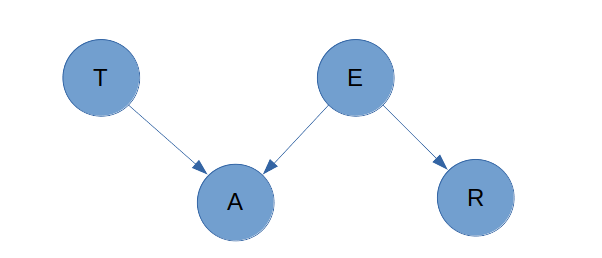

In [2]:
PATH = "/Users/reblochonMasque/Documents/Drawings/"
Image(filename = "./example_1.png", width=500, height=500)

T - преступник,
A - сигнализация,
E - землятресение,
R - сообщение по радио о землятресении.

$$
\mathbf{P}(A,T,E,R) = \mathbf{P}(A|T,E)\cdot \mathbf{P}(R|E)\cdot \mathbf{P}(E)\cdot \mathbf{P}(T)
$$

In [2]:
inp_data = pd.DataFrame({"Prob":["P(T=1)","P(E=1)"], "value":[1e-3, 1e-2]})

In [3]:
inp_data

,Prob,value
0,P(T=1),0.001
1,P(E=1),0.010


In [4]:
inp_data_cond = pd.DataFrame({"P(A=1|T,E)":["P(T=0)","P(T=1)"], "E=0":[0, 1], "E=1":[1/10,1]})
inp_data_cond

,"P(A=1|T,E)",E=0,E=1
0,P(T=0),0,0.1
1,P(T=1),1,1.0


In [5]:
inp_data_re = pd.DataFrame({"P(R|E)":["E=0", "E=1"],"value":[0, 1/2]})
inp_data_re

,P(R|E),value
0,E=0,0.0
1,E=1,0.5


### Вероятность взлома при условии, что включилась сигнализация 

$$\mathbf{P}(T|A) = ?$$ 

$$\mathbf{P}(T|A) = \frac{\mathbf{P}(TA)}{\mathbf{P}(A)} = \frac{\mathbf{P}(TAE) + \mathbf{P}(TA\overline{E})}{\mathbf{P}(A)}=
$$

$$
=\frac{\mathbf{P}(A|TE)\mathbf{P}(TE) + \mathbf{P}(A|T\overline{E})\mathbf{P}(T\overline{E})}{\mathbf{P}(A|TE)\mathbf{P}(TE) + \mathbf{P}(A|\overline{T}E) \mathbf{P}(\overline{T}E) + \mathbf{P}(A|T\overline{E})\mathbf{P}(T\overline{E}) + \mathbf{P}(A |\overline{T}\cdot\overline{E})\mathbf{P}(\overline{T}\cdot\overline{E})}
$$
$$
\mathbf{P}(TE) = \mathbf{P}(T)\mathbf{P}(E) = p_tp_e 
$$
$$
\mathbf{P}(T\overline{E}) = \mathbf{P}(T)\mathbf{P}(\overline{E})= p_t(1-p_e)
$$
$$
\mathbf{P}(\overline{T}\cdot\overline{E}) = \mathbf{P}(\overline{T})\mathbf{P}(\overline{E})= (1-p_t)p_e
$$
$$
\mathbf{P}(\overline{T}\cdot\overline{E}) = \mathbf{P}(\overline{T})\mathbf{P}(\overline{E}) = (1-p_t)(1-p_e)
$$

In [7]:
p_a_te = 1
p_a_tne = 1
p_a_ntne = 0
p_a_nte = 1/10
p_t = 1e-3
p_e = 1e-2
pc = np.array([p_a_te, p_a_tne, p_a_nte, p_a_ntne])
ph = np.array([p_t*p_e, p_t*(1-p_e), (1-p_t)*p_e, (1-p_t)*(1-p_e)])
p = np.sum((pc*ph)[:2])
p_t_a =  p/ph.dot(pc).sum()
print(f"Result: {p_t_a}")

Result: 0.5002501250625313


### При условии сообщения по радио и включения сигнализации

$$\mathbf{P}(T|A,R) = ?$$ 

$$\mathbf{P}(T|A,R) = \frac{\mathbf{P}(TAR)}{\mathbf{P}(AR)} = \frac{\mathbf{P}(TARE) + \mathbf{P}(TAR\overline{E})}{\mathbf{P}(AR)} =\frac{\mathbf{P}(TARE) + \mathbf{P}(TAR\overline{E})}{\mathbf{P}(ARTE) + \mathbf{P}(AR\overline{T}E) + \mathbf{P}(ART\overline{E}) + \mathbf{P}(AR\overline{T}\cdot\overline{E})}$$
$$
$$

Д/З

### Пример 2

Имеется нечестная монета

Распределение для правдоподобия Бернулли:
$p(h,t|\theta) = \theta^h(1-\theta)^t$

Пусть априорное распределение для $\theta \sim R(0,1)$

Тогда на первом шаге имеем:

$$
p(\theta|h=1) = \frac{p(h=1,t=0|\theta)p(\theta)}{p(h)}
$$

$$
p(h=1|\theta) = \theta
$$
Тогда

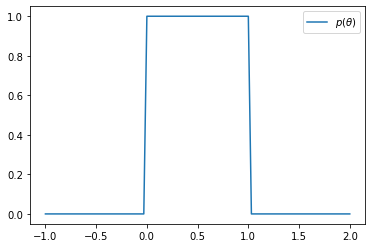

In [8]:
from scipy.stats import uniform

import matplotlib.pyplot as plt
x = np.linspace(-1,2,100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x), label="$p(\\theta)$")

plt.legend()

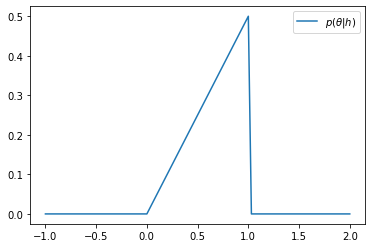

In [9]:
x = np.linspace(-1,2,100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x)*x/2, label="$p(\\theta|h)$")
plt.legend()

В общем случае априорную плотность для $\theta$ положим $B(a,b)$ распределением, оно является сопряженным с правдоподобием $p(h,t|\theta) = \theta^h(1-\theta)^t$.

Тогда апостериорная плотность будет тоже Бета:
$$
p(\theta|t,h) \propto \theta^{t}(1-\theta)^{h}\cdot\theta^{a-1}(1-\theta)^{b-1}\Rightarrow
$$
$$
p(\theta|t,t) \propto \theta^{t + a-1}(1-\theta)^{h+b-1}\Rightarrow
$$
$$
p(\theta|t,h) = B(t + a, h+b).
$$

Например если выпадет шесть решек и шесть орлов, тогда $p(\theta|t,h) = B(t + a, h+b)$

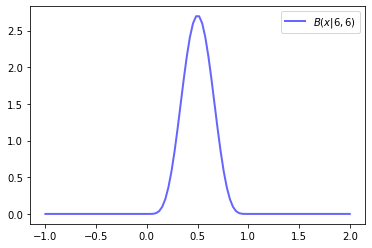

In [10]:
from scipy.stats import beta
a = 6
b = 6
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, 6, 6), 'b', lw=2, alpha=0.6, label=f'$B(x|{a},{b})$')
plt.legend()

# Предсказание

$$
p(y|D) = \int\limits_{\Theta} p(y|\theta)p(\theta|D)\,d\theta \propto \int\limits_{\Theta} p(y|\theta)p(\theta)p(D|\theta)
$$

Прогноз для нечестной монеты:

$$
p(h=1|D) = \int_{-\infty}^{\infty} p(h=1|\theta)p(\theta|D)\,d\theta =  \int_{-\infty}^{\infty} \theta p(\theta|D)\, d\theta =  \int_{0}^{1} \frac{\theta^2}{\int_0^1 \tilde\theta \,d\tilde\theta} \,d\theta = \frac{1/3}{1/2}
= \frac23
$$